# Plotter for general case

## Plot one experiment

Moviepy - Building video __temp__.mp4.
Moviepy - Writing video __temp__.mp4



t:  96%|█████████▌| 96/100 [00:02<00:00, 31.88it/s, now=None]

KeyboardInterrupt: 

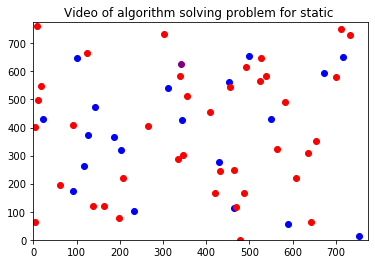

t:  96%|█████████▌| 96/100 [00:19<00:00, 31.88it/s, now=None]

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from moviepy.editor import VideoClip
from moviepy.video.io.bindings import mplfig_to_npimage

# Upload files

nmbr_TA = 40
nmbr_NA = 20

N_exp = 1
path_to_experiment = f'data/{nmbr_TA}TA{nmbr_NA}NA/experiment_{N_exp}'
path_NA = path_to_experiment + "/NA_positions.txt"
path_TA = path_to_experiment + "/TA_positions.txt"
path_performance = path_to_experiment + "/performance.txt"


arr_performance = np.loadtxt(path_performance,delimiter=",", dtype=np.float32)


side = np.sqrt(nmbr_NA + nmbr_TA)*100
arr_NA = np.loadtxt(path_NA,delimiter=",", dtype=np.float32)*100
arr_NA = arr_NA.reshape((-1,nmbr_NA,2))

arr_TA = np.loadtxt(path_TA,delimiter=",", dtype=np.float32)*100
arr_TA = arr_TA.reshape((-1,nmbr_TA,2))


# Create Video

# duration of the video

frames = arr_NA.shape[0]
fps = 10
duration = int(frames/fps)

# matplot subplot
fig, ax = plt.subplots()
 
# method to get frames
def make_frame(t):
     
    # clear
    ax.clear()
    idx = int(t*fps)
    
    # plotting line
    ax.scatter(arr_TA[0][0,0],arr_TA[0][0,1],c='purple')
    ax.scatter(arr_NA[idx][:,0],arr_NA[idx][:,1],c='blue')
    ax.scatter(arr_TA[0][1:,0],arr_TA[0][1:,1],c='red')
    ax.set_xlim(0,side)
    ax.set_ylim(0,side)
    ax.set_xlabel("X position (meters)")
    ax.set_ylabel("Y position (meters)")
    ax.set_title("Video of algorithm solving problem for static ")
    # returning numpy image
    return mplfig_to_npimage(fig)
 
# creating animation
animation = VideoClip(make_frame, duration = duration)
 
# displaying animation with auto play and looping
display(animation.ipython_display(fps = fps, loop = True, autoplay = True))
animation.write_videofile(path_to_experiment + "/video.mp4",fps=fps)



# Create Image

fig_1, (ax1,ax2,ax3) = plt.subplots(1,3)
fig_1.set_size_inches(20,6)
ax1.scatter(arr_NA[0][:,0],arr_NA[0][:,1],c='blue')
ax1.scatter(arr_TA[0][:,0],arr_TA[0][:,1],c='red')
ax1.set_xlim(0,side)
ax1.set_ylim(0,side)
ax1.set_xlabel("X position (meters)")
ax1.set_ylabel("Y position (meters)")
ax1.set_title("Initial positions ")

ax2.scatter(arr_NA[-1][:,0],arr_NA[-1][:,1],c='blue')
ax2.scatter(arr_TA[-1][:,0],arr_TA[-1][:,1],c='red')
ax2.set_xlim(0,side)
ax2.set_ylim(0,side)
ax2.set_xlabel("X position (meters)")
ax2.set_ylabel("Y position (meters)")
ax2.set_title("Final positions")


ax3.plot(arr_performance)
ax3.set_ylabel("Performance")
ax3.set_xlabel("Iteration")
ax3.set_title("Performance function")

fig_1.show()
fig_1.savefig(path_to_experiment + "/image.png")

## Plot All experiments

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from moviepy.editor import VideoClip
from moviepy.video.io.bindings import mplfig_to_npimage

# Upload files

nmbr_TA = 40
nmbr_NA = 20

N_exp = 0
for N_exp in range(10):
    path_to_experiment = f'data/{nmbr_TA}TA{nmbr_NA}NA/experiment_{N_exp}'
    path_NA = path_to_experiment + "/NA_positions.txt"
    path_TA = path_to_experiment + "/TA_positions.txt"
    path_performance = path_to_experiment + "/performance.txt"


    arr_performance = np.loadtxt(path_performance,delimiter=",", dtype=np.float32)


    side = np.sqrt(nmbr_NA + nmbr_TA)*100
    arr_NA = np.loadtxt(path_NA,delimiter=",", dtype=np.float32)*100
    arr_NA = arr_NA.reshape((-1,nmbr_NA,2))

    arr_TA = np.loadtxt(path_TA,delimiter=",", dtype=np.float32)*100
    arr_TA = arr_TA.reshape((-1,nmbr_TA,2))


    # Create Video

    # duration of the video

    frames = arr_NA.shape[0]
    fps = 10
    duration = int(frames/fps)

    # matplot subplot
    fig, ax = plt.subplots()
    
    # method to get frames
    def make_frame(t):
        
        # clear
        ax.clear()
        idx = int(t*fps)
        
        # plotting line
        ax.scatter(arr_NA[idx][:,0],arr_NA[idx][:,1],c='blue')
        ax.scatter(arr_TA[0][0,0],arr_TA[0][0,1],c='purple')
        ax.scatter(arr_TA[0][1:,0],arr_TA[0][1:,1],c='red')
        ax.set_xlim(0,side)
        ax.set_ylim(0,side)
        ax.set_xlabel("X position (meters)")
        ax.set_ylabel("Y position (meters)")
        ax.set_title("Video of algorithm solving problem for static ")
        # returning numpy image
        return mplfig_to_npimage(fig)
    
    # creating animation
    animation = VideoClip(make_frame, duration = duration)
    
    # displaying animation with auto play and looping
    animation.write_videofile(path_to_experiment + "/video.mp4",fps=fps)



    # Create Image

    fig_1, (ax1,ax2,ax3) = plt.subplots(1,3)
    fig_1.set_size_inches(20,6)
    ax1.scatter(arr_NA[0][:,0],arr_NA[0][:,1],c='blue')
    ax1.scatter(arr_TA[0][1:,0],arr_TA[0][1:,1],c='red')
    ax1.scatter(arr_TA[0][0,0],arr_TA[0][0,1],c='purple')

    ax1.set_xlim(0,side)
    ax1.set_ylim(0,side)
    ax1.set_xlabel("X position (meters)")
    ax1.set_ylabel("Y position (meters)")
    ax1.set_title("Initial positions ")

    ax2.scatter(arr_NA[-1][:,0],arr_NA[-1][:,1],c='blue')
    ax2.scatter(arr_TA[-1][1:,0],arr_TA[-1][1:,1],c='red')
    ax2.scatter(arr_TA[-1][0,0],arr_TA[-1][0,1],c='purple')
    ax2.set_xlim(0,side)
    ax2.set_ylim(0,side)
    ax2.set_xlabel("X position (meters)")
    ax2.set_ylabel("Y position (meters)")
    ax2.set_title("Final positions")


    ax3.plot(arr_performance)
    ax3.set_ylabel("Performance")
    ax3.set_xlabel("Iteration")
    ax3.set_title("Performance function")

    fig_1.savefig(path_to_experiment + "/image.png")

## Plot for paper

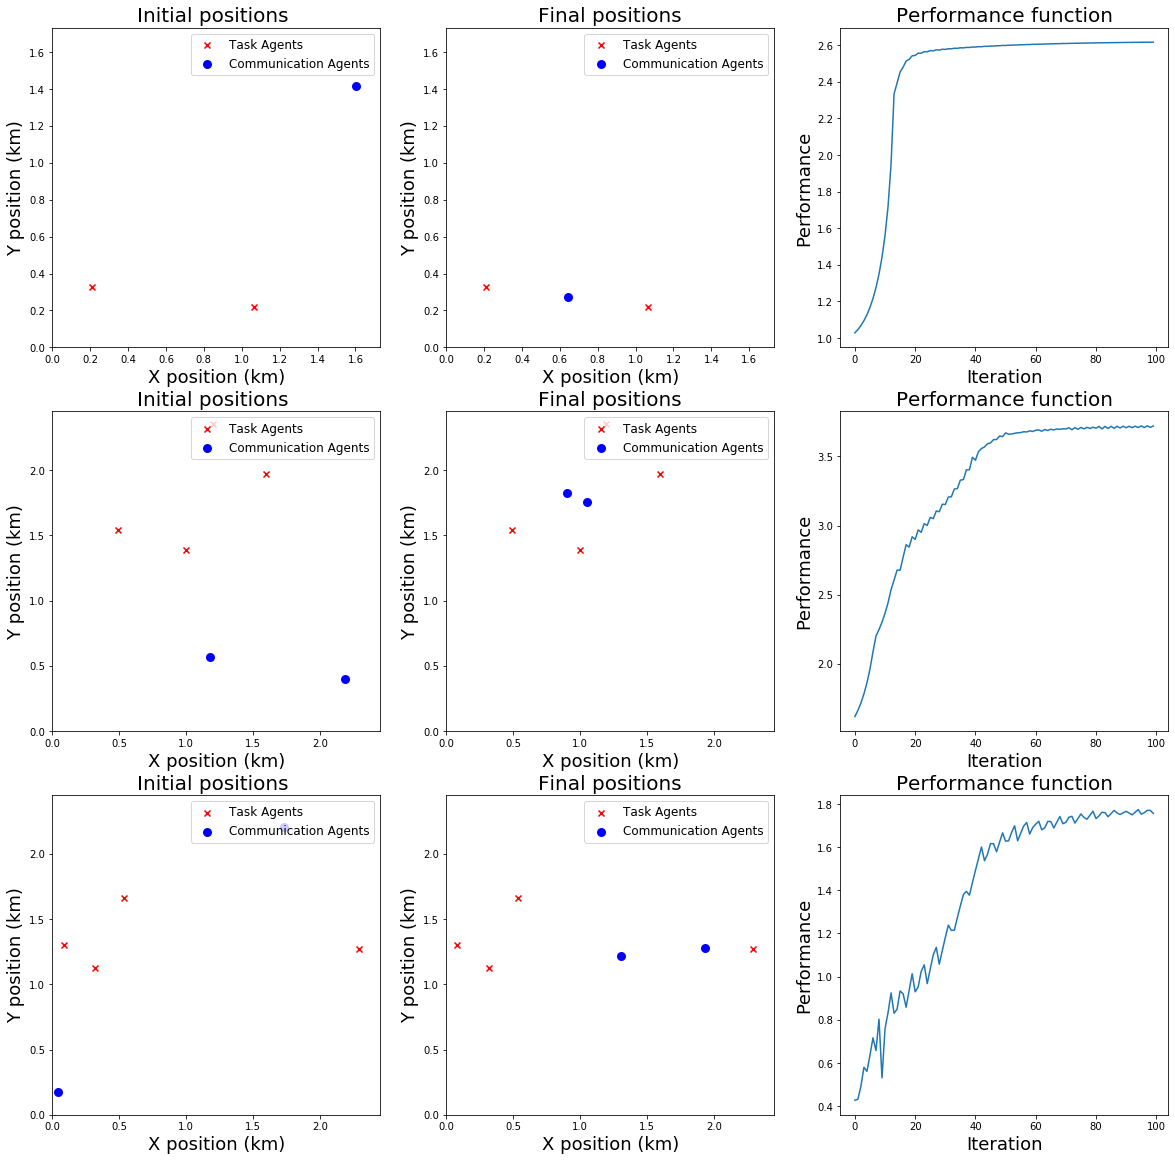

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from moviepy.editor import VideoClip
from moviepy.video.io.bindings import mplfig_to_npimage

# Upload files

nmbr_TA = 2
nmbr_NA = 1
N_exp = 37

path_to_experiment = f'data/{nmbr_TA}TA{nmbr_NA}NA/experiment_{N_exp}'
path_NA = path_to_experiment + "/NA_positions.txt"
path_TA = path_to_experiment + "/TA_positions.txt"
path_performance = path_to_experiment + "/performance.txt"


arr_performance_1 = np.loadtxt(path_performance,delimiter=",", dtype=np.float32)


side_1 = np.sqrt(nmbr_NA + nmbr_TA)
arr_NA = np.loadtxt(path_NA,delimiter=",", dtype=np.float32)
arr_NA_1 = arr_NA.reshape((-1,nmbr_NA,2))

arr_TA = np.loadtxt(path_TA,delimiter=",", dtype=np.float32)
arr_TA_1 = arr_TA.reshape((-1,nmbr_TA,2))


nmbr_TA = 4
nmbr_NA = 2

N_exp = 6

path_to_experiment = f'data/{nmbr_TA}TA{nmbr_NA}NA/experiment_{N_exp}'
path_NA = path_to_experiment + "/NA_positions.txt"
path_TA = path_to_experiment + "/TA_positions.txt"
path_performance = path_to_experiment + "/performance.txt"


arr_performance_2 = np.loadtxt(path_performance,delimiter=",", dtype=np.float32)


side_2 = np.sqrt(nmbr_NA + nmbr_TA)
arr_NA = np.loadtxt(path_NA,delimiter=",", dtype=np.float32)
arr_NA_2 = arr_NA.reshape((-1,nmbr_NA,2))

arr_TA = np.loadtxt(path_TA,delimiter=",", dtype=np.float32)
arr_TA_2 = arr_TA.reshape((-1,nmbr_TA,2))


nmbr_TA = 4
nmbr_NA = 2

N_exp = 0

path_to_experiment = f'data/{nmbr_TA}TA{nmbr_NA}NA/experiment_{N_exp}'
path_NA = path_to_experiment + "/NA_positions.txt"
path_TA = path_to_experiment + "/TA_positions.txt"
path_performance = path_to_experiment + "/performance.txt"


arr_performance_3 = np.loadtxt(path_performance,delimiter=",", dtype=np.float32)


side_3 = np.sqrt(nmbr_NA + nmbr_TA)
arr_NA = np.loadtxt(path_NA,delimiter=",", dtype=np.float32)
arr_NA_3 = arr_NA.reshape((-1,nmbr_NA,2))

arr_TA = np.loadtxt(path_TA,delimiter=",", dtype=np.float32)
arr_TA_3 = arr_TA.reshape((-1,nmbr_TA,2))

# Create Image

fig_1, ax = plt.subplots(3,3)
fig_1.set_size_inches(20,20)

ax[0,0].scatter(arr_TA_1[0][:,0],arr_TA_1[0][:,1],c='red',marker='x',linewidths=4)
ax[0,0].scatter(arr_NA_1[0][:,0],arr_NA_1[0][:,1],c='blue',linewidths=3)
ax[0,0].set_xlim(0,side_1)
ax[0,0].set_ylim(0,side_1)
ax[0,0].set_xlabel("X position (km)", fontsize=18)
ax[0,0].set_ylabel("Y position (km)", fontsize=18)
ax[0,0].set_title("Initial positions ", fontsize=20)
ax[0,0].legend(['Task Agents', 'Communication Agents'],loc='upper right', fontsize=12)

ax[0,1].scatter(arr_TA_1[-1][:,0],arr_TA_1[-1][:,1],c='red',marker='x',linewidths=4)
ax[0,1].scatter(arr_NA_1[-1][:,0],arr_NA_1[-1][:,1],c='blue',linewidths=3)
ax[0,1].set_xlim(0,side_1)
ax[0,1].set_ylim(0,side_1)
ax[0,1].set_xlabel("X position (km)", fontsize=18)
ax[0,1].set_ylabel("Y position (km)", fontsize=18)
ax[0,1].set_title("Final positions", fontsize=20)
ax[0,1].legend(['Task Agents', 'Communication Agents'],loc='upper right', fontsize=12)


ax[0,2].plot(arr_performance_1)
ax[0,2].set_ylabel("Performance", fontsize=18)
ax[0,2].set_xlabel("Iteration", fontsize=18)
ax[0,2].set_title("Performance function", fontsize=20)


ax[1,0].scatter(arr_TA_2[0][:,0],arr_TA_2[0][:,1],c='red',marker='x',linewidths=4)
ax[1,0].scatter(arr_NA_2[0][:,0],arr_NA_2[0][:,1],c='blue',linewidths=3)
ax[1,0].set_xlim(0,side_2)
ax[1,0].set_ylim(0,side_2)
ax[1,0].set_xlabel("X position (km)", fontsize=18)
ax[1,0].set_ylabel("Y position (km)", fontsize=18)
ax[1,0].set_title("Initial positions ", fontsize=20)
ax[1,0].legend(['Task Agents', 'Communication Agents'],loc='upper right', fontsize=12)

ax[1,1].scatter(arr_TA_2[-1][:,0],arr_TA_2[-1][:,1],c='red',marker='x',linewidths=4)
ax[1,1].scatter(arr_NA_2[-1][:,0],arr_NA_2[-1][:,1],c='blue',linewidths=3)
ax[1,1].set_xlim(0,side_2)
ax[1,1].set_ylim(0,side_2)
ax[1,1].set_xlabel("X position (km)", fontsize=18)
ax[1,1].set_ylabel("Y position (km)", fontsize=18)
ax[1,1].set_title("Final positions", fontsize=20)
ax[1,1].legend(['Task Agents', 'Communication Agents'],loc='upper right', fontsize=12)


ax[1,2].plot(arr_performance_2)
ax[1,2].set_ylabel("Performance", fontsize=18)
ax[1,2].set_xlabel("Iteration", fontsize=18)
ax[1,2].set_title("Performance function", fontsize=20)


ax[2,0].scatter(arr_TA_3[0][:,0],arr_TA_3[0][:,1],c='red',marker='x',linewidths=4)
ax[2,0].scatter(arr_NA_3[0][:,0],arr_NA_3[0][:,1],c='blue',linewidths=3)
ax[2,0].set_xlim(0,side_3)
ax[2,0].set_ylim(0,side_3)
ax[2,0].set_xlabel("X position (km)", fontsize=18)
ax[2,0].set_ylabel("Y position (km)", fontsize=18)
ax[2,0].set_title("Initial positions ", fontsize=20)
ax[2,0].legend(['Task Agents', 'Communication Agents'],loc='upper right', fontsize=12)

ax[2,1].scatter(arr_TA_3[-1][:,0],arr_TA_3[-1][:,1],c='red',marker='x',linewidths=4)
ax[2,1].scatter(arr_NA_3[-1][:,0],arr_NA_3[-1][:,1],c='blue',linewidths=3)
ax[2,1].set_xlim(0,side_3)
ax[2,1].set_ylim(0,side_3)
ax[2,1].set_xlabel("X position (km)", fontsize=18)
ax[2,1].set_ylabel("Y position (km)", fontsize=18)
ax[2,1].set_title("Final positions", fontsize=20)
ax[2,1].legend(['Task Agents', 'Communication Agents'],loc='upper right', fontsize=12)

ax[2,2].plot(arr_performance_3)
ax[2,2].set_ylabel("Performance", fontsize=18)
ax[2,2].set_xlabel("Iteration", fontsize=18)
ax[2,2].set_title("Performance function", fontsize=20)


fig_1.show()
fig_1.savefig("plots/intuitive_cases.png")

# Plotter ONE_SINK

## Plot all experiments

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from moviepy.editor import VideoClip
from moviepy.video.io.bindings import mplfig_to_npimage

# Upload files

nmbr_TA = 25
nmbr_NA = 10

for N_exp in range(30):
    for idx_sink in range(6):
        path_to_experiment = f'data_one_sink/{nmbr_TA}TA{nmbr_NA}NA/experiment_{N_exp}/sink_{idx_sink}'
        path_NA = path_to_experiment + "/NA_positions.txt"
        path_TA = path_to_experiment + "/TA_positions.txt"
        path_performance = path_to_experiment + "/performance.txt"


        arr_performance = np.loadtxt(path_performance,delimiter=",", dtype=np.float32)


        side = np.sqrt(nmbr_NA + nmbr_TA)*100
        arr_NA = np.loadtxt(path_NA,delimiter=",", dtype=np.float32)*100
        arr_NA = arr_NA.reshape((-1,nmbr_NA,2))

        arr_TA = np.loadtxt(path_TA,delimiter=",", dtype=np.float32)*100
        arr_TA = arr_TA.reshape((-1,nmbr_TA,2))


        # Create Image

        fig_1, (ax1,ax2,ax3) = plt.subplots(1,3)
        fig_1.set_size_inches(20,6)
        ax1.scatter(arr_NA[0][:,0],arr_NA[0][:,1],c='blue')
        ax1.scatter(arr_TA[0][:,0],arr_TA[0][:,1],c='red')
        if (idx_sink != 5):
            ax1.scatter(arr_TA[0][idx_sink,0],arr_TA[0][idx_sink,1],c='purple')
            

        ax1.set_xlim(0,side)
        ax1.set_ylim(0,side)
        ax1.set_xlabel("X position (meters)")
        ax1.set_ylabel("Y position (meters)")
        ax1.set_title("Initial positions ")

        ax2.scatter(arr_NA[-1][:,0],arr_NA[-1][:,1],c='blue')
        ax2.scatter(arr_TA[0][:,0],arr_TA[0][:,1],c='red')
        if (idx_sink != 5):
            ax2.scatter(arr_TA[-1][idx_sink,0],arr_TA[-1][idx_sink,1],c='purple')
        ax2.set_xlim(0,side)
        ax2.set_ylim(0,side)
        ax2.set_xlabel("X position (meters)")
        ax2.set_ylabel("Y position (meters)")
        ax2.set_title("Final positions")


        ax3.plot(arr_performance)
        ax3.set_ylabel("Performance")
        ax3.set_xlabel("Iteration")
        ax3.set_title("Performance function")

        fig_1.savefig(path_to_experiment + "/image.png")

## Plot for Paper

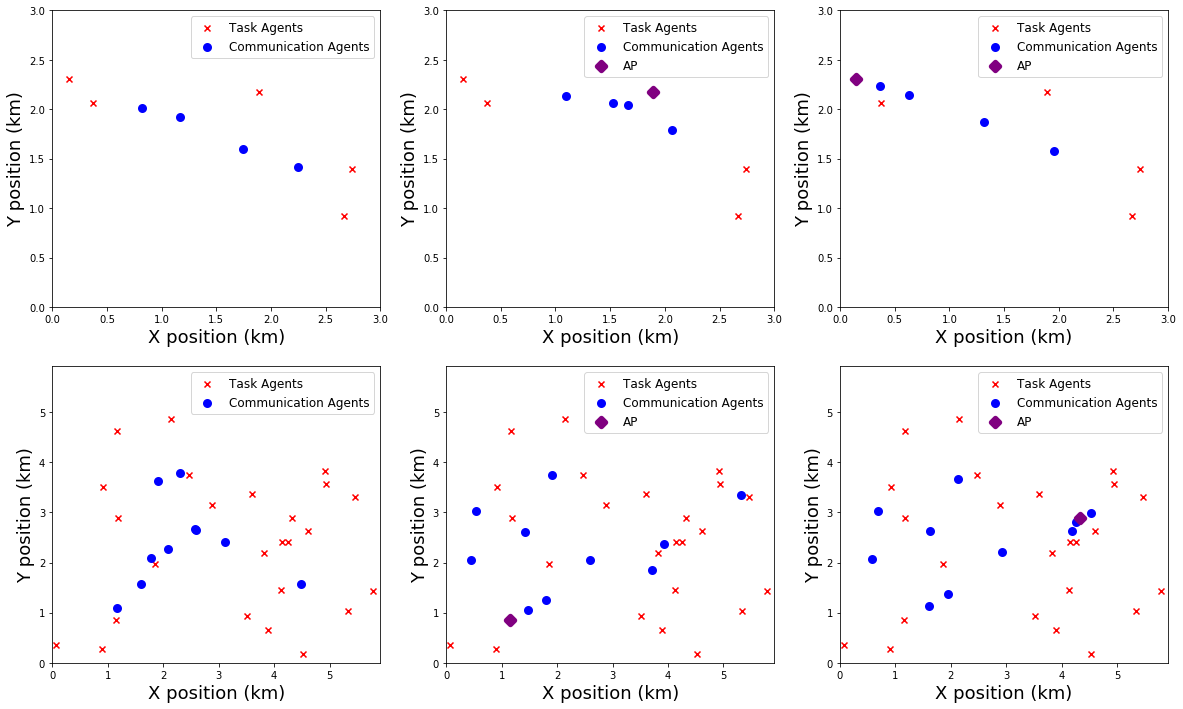

In [8]:

import numpy as np
import matplotlib.pyplot as plt
from moviepy.editor import VideoClip
from moviepy.video.io.bindings import mplfig_to_npimage

# Upload files

nmbr_TA = 5
nmbr_NA = 4
N_exp = 2
sink_1_1 = 5
sink_1_2 = 3
sink_1_3 = 1
path_to_experiment = f'data_one_sink/{nmbr_TA}TA{nmbr_NA}NA/experiment_{N_exp}'
path_NA = "/NA_positions.txt"
path_TA = "/TA_positions.txt"

side_1 = np.sqrt(nmbr_NA + nmbr_TA)

arr_TA = np.loadtxt(path_to_experiment + f'/sink_{sink_1_1}' + path_TA,delimiter=",", dtype=np.float32)
arr_TA_1 = arr_TA.reshape((-1,nmbr_TA,2))

arr_NA = np.loadtxt(path_to_experiment + f'/sink_{sink_1_1}' + path_NA,delimiter=",", dtype=np.float32)
arr_NA_1_1 = arr_NA.reshape((-1,nmbr_NA,2))

arr_NA = np.loadtxt(path_to_experiment + f'/sink_{sink_1_2}' + path_NA,delimiter=",", dtype=np.float32)
arr_NA_1_2 = arr_NA.reshape((-1,nmbr_NA,2))

arr_NA = np.loadtxt(path_to_experiment + f'/sink_{sink_1_3}' + path_NA,delimiter=",", dtype=np.float32)
arr_NA_1_3 = arr_NA.reshape((-1,nmbr_NA,2))


nmbr_TA = 25
nmbr_NA = 10
N_exp = 21
sink_2_1 = 5
sink_2_2 = 1
sink_2_3 = 2
path_to_experiment = f'data_one_sink/{nmbr_TA}TA{nmbr_NA}NA/experiment_{N_exp}'
path_NA = "/NA_positions.txt"
path_TA = "/TA_positions.txt"

side_2 = np.sqrt(nmbr_NA + nmbr_TA)

arr_TA = np.loadtxt(path_to_experiment + f'/sink_{sink_2_1}' + path_TA,delimiter=",", dtype=np.float32)
arr_TA_2 = arr_TA.reshape((-1,nmbr_TA,2))

arr_NA = np.loadtxt(path_to_experiment + f'/sink_{sink_2_1}' + path_NA,delimiter=",", dtype=np.float32)
arr_NA_2_1 = arr_NA.reshape((-1,nmbr_NA,2))

arr_NA = np.loadtxt(path_to_experiment + f'/sink_{sink_2_2}' + path_NA,delimiter=",", dtype=np.float32)
arr_NA_2_2 = arr_NA.reshape((-1,nmbr_NA,2))

arr_NA = np.loadtxt(path_to_experiment + f'/sink_{sink_2_3}' + path_NA,delimiter=",", dtype=np.float32)
arr_NA_2_3 = arr_NA.reshape((-1,nmbr_NA,2))

# Create Image

fig_1, ax = plt.subplots(2,3)
fig_1.set_size_inches(20,12)

ax[0,0].scatter(arr_TA_1[0][:,0],arr_TA_1[0][:,1],c='red',marker='x',linewidths=4)
ax[0,0].scatter(arr_NA_1_1[-1][:,0],arr_NA_1_1[-1][:,1],c='blue',linewidths=3)
ax[0,0].set_xlim(0,side_1)
ax[0,0].set_ylim(0,side_1)
ax[0,0].set_xlabel("X position (km)", fontsize=18)
ax[0,0].set_ylabel("Y position (km)", fontsize=18)
ax[0,0].legend(['Task Agents', 'Communication Agents'],loc='upper right', fontsize=12)


ax[0,1].scatter(arr_TA_1[0][:,0],arr_TA_1[0][:,1],c='red',marker='x',linewidths=4)
ax[0,1].scatter(arr_NA_1_2[-1][:,0],arr_NA_1_2[-1][:,1],c='blue',linewidths=3)
ax[0,1].scatter(arr_TA_1[0][sink_1_2,0],arr_TA_1[0][sink_1_2,1],c='purple',marker='D',linewidths=5)
ax[0,1].set_xlim(0,side_1)
ax[0,1].set_ylim(0,side_1)
ax[0,1].set_xlabel("X position (km)", fontsize=18)
ax[0,1].set_ylabel("Y position (km)", fontsize=18)
ax[0,1].legend(['Task Agents', 'Communication Agents','AP'],loc='upper right', fontsize=12)

ax[0,2].scatter(arr_TA_1[0][:,0],arr_TA_1[0][:,1],c='red',marker='x',linewidths=4)
ax[0,2].scatter(arr_NA_1_3[-1][:,0],arr_NA_1_3[-1][:,1],c='blue',linewidths=3)
ax[0,2].scatter(arr_TA_1[0][sink_1_3,0],arr_TA_1[0][sink_1_3,1],c='purple',marker='D',linewidths=5)
ax[0,2].set_xlim(0,side_1)
ax[0,2].set_ylim(0,side_1)
ax[0,2].set_xlabel("X position (km)", fontsize=18)
ax[0,2].set_ylabel("Y position (km)", fontsize=18)
ax[0,2].legend(['Task Agents', 'Communication Agents','AP'],loc='upper right', fontsize=12)



ax[1,0].scatter(arr_TA_2[0][:,0],arr_TA_2[0][:,1],c='red',marker='x',linewidths=4)
ax[1,0].scatter(arr_NA_2_1[-1][:,0],arr_NA_2_1[-1][:,1],c='blue',linewidths=3)
ax[1,0].set_xlim(0,side_2)
ax[1,0].set_ylim(0,side_2)
ax[1,0].set_xlabel("X position (km)", fontsize=18)
ax[1,0].set_ylabel("Y position (km)", fontsize=18)
ax[1,0].legend(['Task Agents', 'Communication Agents'],loc='upper right', fontsize=12)


ax[1,1].scatter(arr_TA_2[0][:,0],arr_TA_2[0][:,1],c='red',marker='x',linewidths=4)
ax[1,1].scatter(arr_NA_2_2[-1][:,0],arr_NA_2_2[-1][:,1],c='blue',linewidths=3)
ax[1,1].scatter(arr_TA_2[0][sink_2_2,0],arr_TA_2[0][sink_2_2,1],c='purple',marker='D',linewidths=5)
ax[1,1].set_xlim(0,side_2)
ax[1,1].set_ylim(0,side_2)
ax[1,1].set_xlabel("X position (km)", fontsize=18)
ax[1,1].set_ylabel("Y position (km)", fontsize=18)
ax[1,1].legend(['Task Agents', 'Communication Agents','AP'],loc='upper right', fontsize=12)

ax[1,2].scatter(arr_TA_2[0][:,0],arr_TA_2[0][:,1],c='red',marker='x',linewidths=4)
ax[1,2].scatter(arr_NA_2_3[-1][:,0],arr_NA_2_3[-1][:,1],c='blue',linewidths=3)
ax[1,2].scatter(arr_TA_2[0][sink_2_3,0],arr_TA_2[0][sink_2_3,1],c='purple',marker='D',linewidths=5)
ax[1,2].set_xlim(0,side_2)
ax[1,2].set_ylim(0,side_2)
ax[1,2].set_xlabel("X position (km)", fontsize=18)
ax[1,2].set_ylabel("Y position (km)", fontsize=18)
ax[1,2].legend(['Task Agents', 'Communication Agents','AP'],loc='upper right', fontsize=12)



fig_1.show()
fig_1.savefig("plots/one_sink_cases.png")

# Plotter Multiple_Sinks

## Plot all experiments

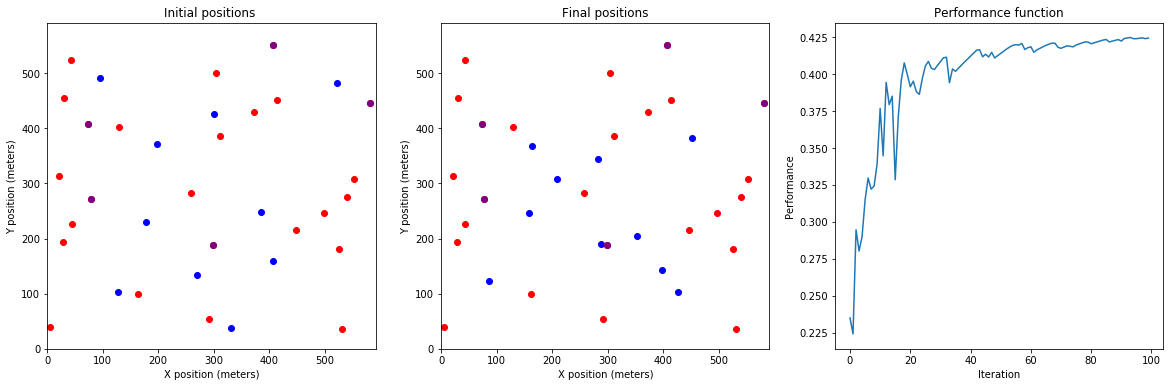

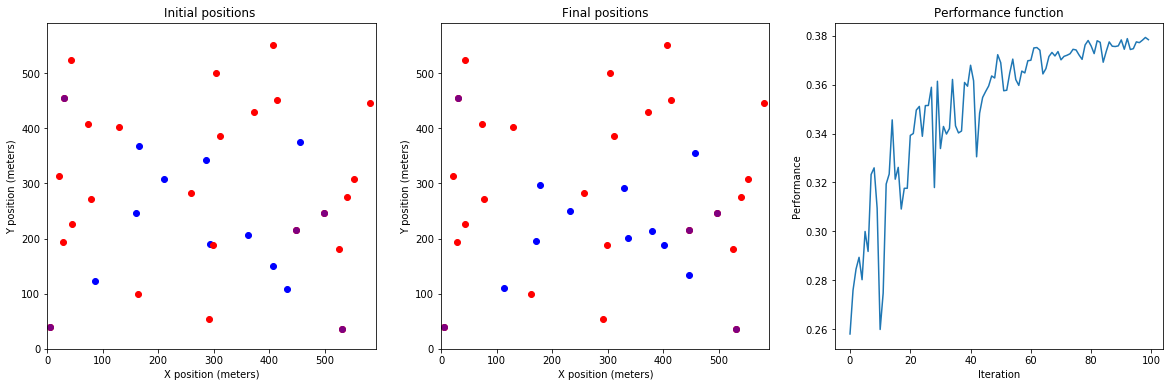

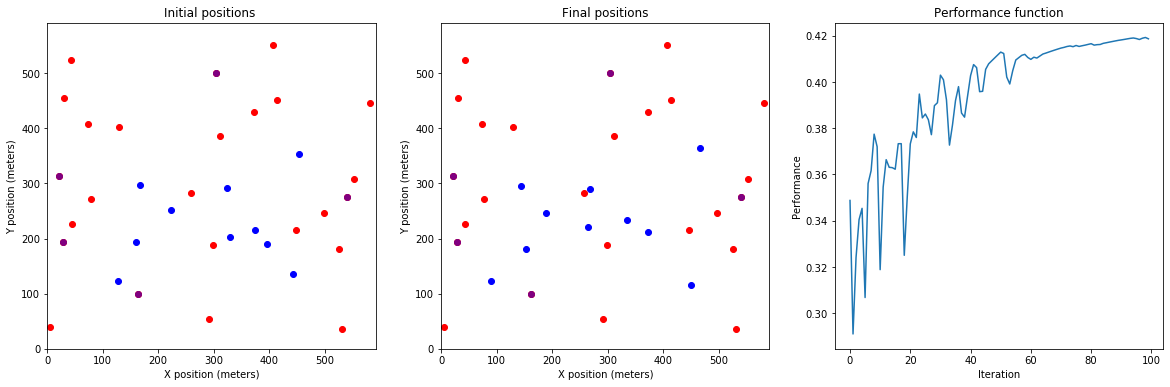

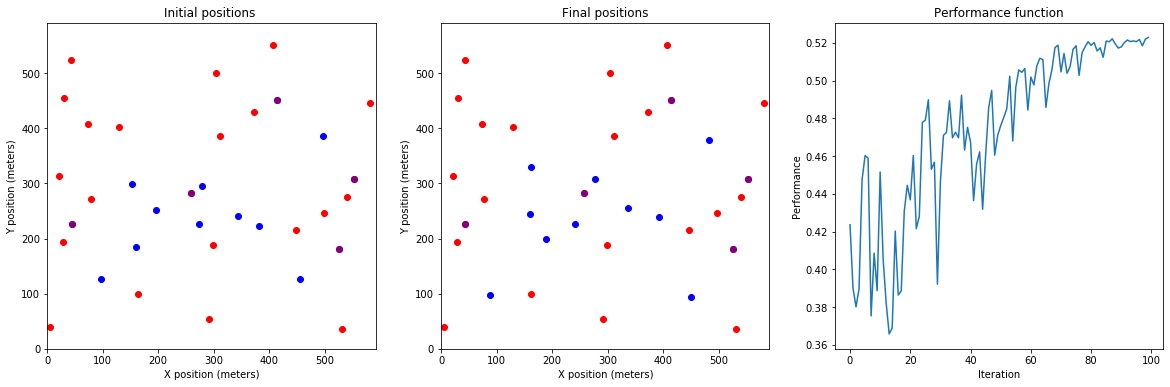

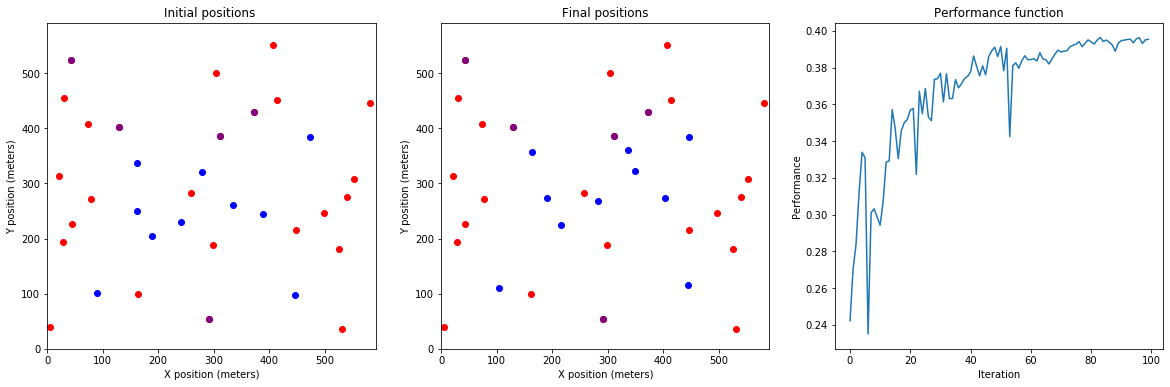

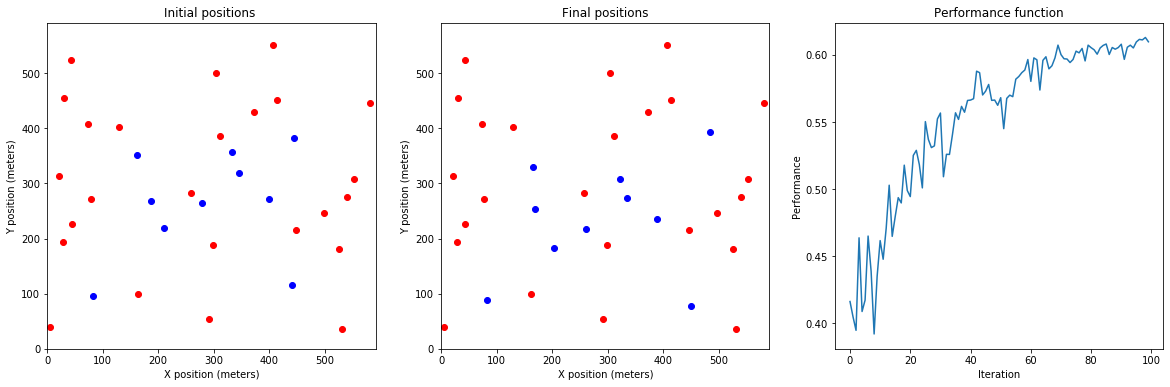

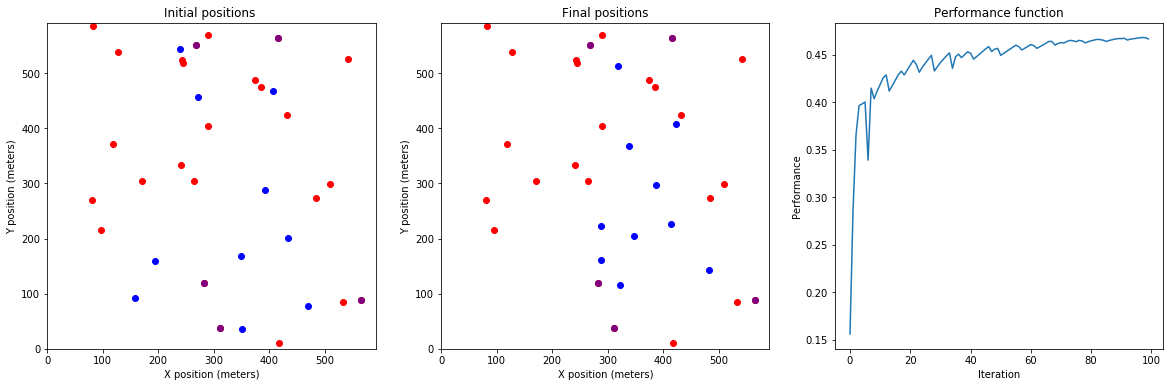

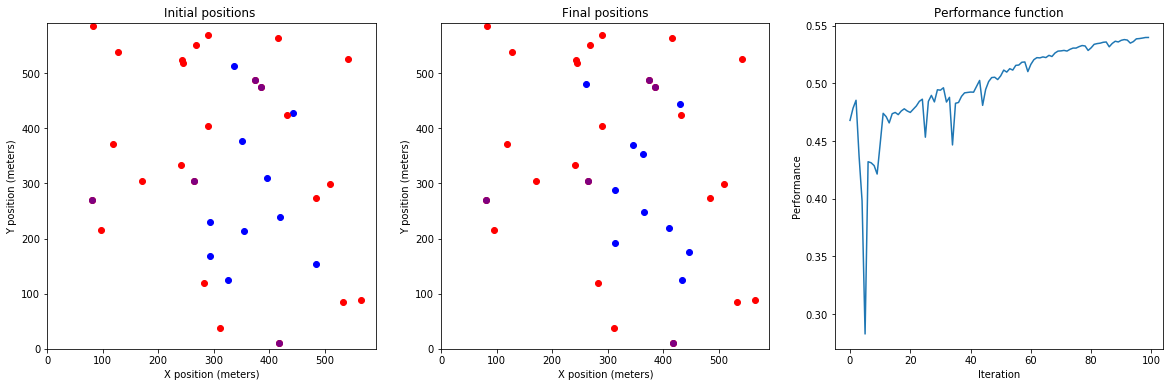

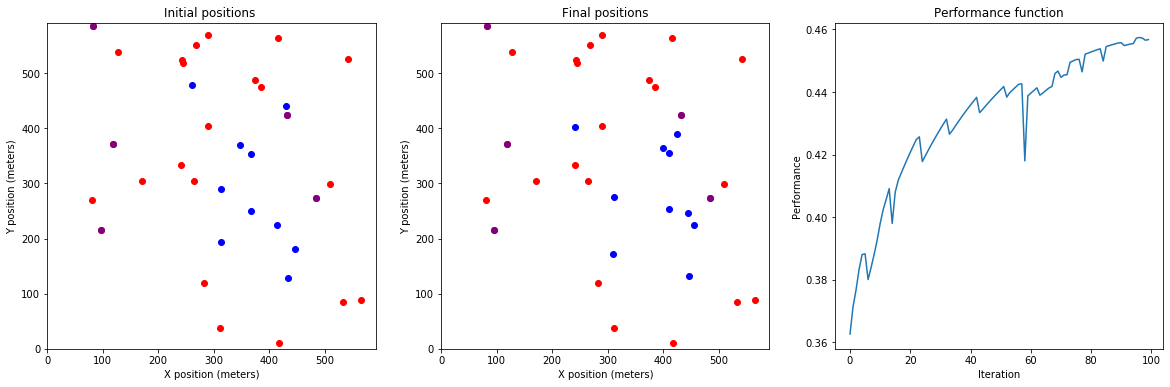

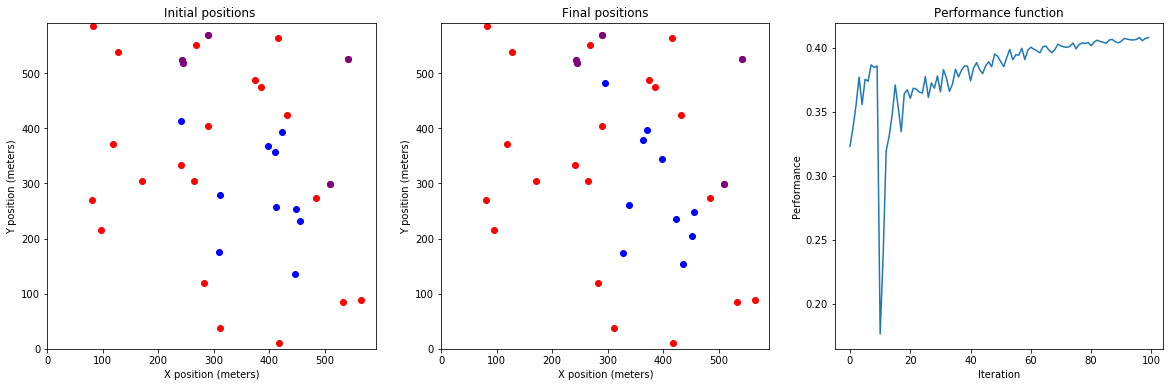

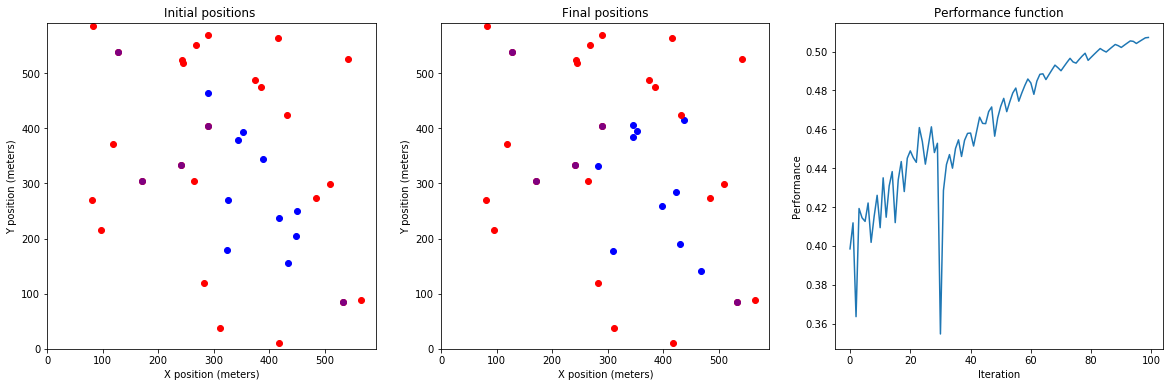

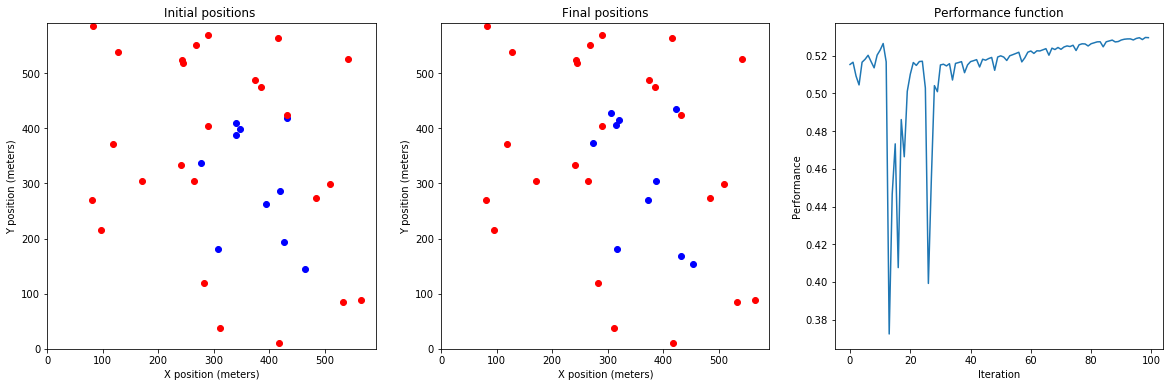

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from moviepy.editor import VideoClip
from moviepy.video.io.bindings import mplfig_to_npimage

# Upload files

nmbr_TA = 25
nmbr_NA = 10

for N_exp in range(2):
    for idx_sink in range(6):
        idx = []
        for j in range(nmbr_TA):
            if ((j+idx_sink)%5 == 0):
                idx.append(j)
                
        path_to_experiment = f'data_multiple_sink/{nmbr_TA}TA{nmbr_NA}NA/experiment_{N_exp}/sink_{idx_sink}'
        path_NA = path_to_experiment + "/NA_positions.txt"
        path_TA = path_to_experiment + "/TA_positions.txt"
        path_performance = path_to_experiment + "/performance.txt"


        arr_performance = np.loadtxt(path_performance,delimiter=",", dtype=np.float32)


        side = np.sqrt(nmbr_NA + nmbr_TA)*100
        arr_NA = np.loadtxt(path_NA,delimiter=",", dtype=np.float32)*100
        arr_NA = arr_NA.reshape((-1,nmbr_NA,2))

        arr_TA = np.loadtxt(path_TA,delimiter=",", dtype=np.float32)*100
        arr_TA = arr_TA.reshape((-1,nmbr_TA,2))


        # Create Image

        fig_1, (ax1,ax2,ax3) = plt.subplots(1,3)
        fig_1.set_size_inches(20,6)
        ax1.scatter(arr_NA[0][:,0],arr_NA[0][:,1],c='blue')
        ax1.scatter(arr_TA[0][:,0],arr_TA[0][:,1],c='red')
        if (idx_sink != 5):
            ax1.scatter(arr_TA[0][idx][:,0],arr_TA[0][idx][:,1],c='purple')
            

        ax1.set_xlim(0,side)
        ax1.set_ylim(0,side)
        ax1.set_xlabel("X position (meters)")
        ax1.set_ylabel("Y position (meters)")
        ax1.set_title("Initial positions ")

        ax2.scatter(arr_NA[-1][:,0],arr_NA[-1][:,1],c='blue')
        ax2.scatter(arr_TA[0][:,0],arr_TA[0][:,1],c='red')
        if (idx_sink != 5):
            ax2.scatter(arr_TA[-1][idx][:,0],arr_TA[-1][idx][:,1],c='purple')
        ax2.set_xlim(0,side)
        ax2.set_ylim(0,side)
        ax2.set_xlabel("X position (meters)")
        ax2.set_ylabel("Y position (meters)")
        ax2.set_title("Final positions")


        ax3.plot(arr_performance)
        ax3.set_ylabel("Performance")
        ax3.set_xlabel("Iteration")
        ax3.set_title("Performance function")

        fig_1.savefig(path_to_experiment + "/image.png")

## Plot for paper

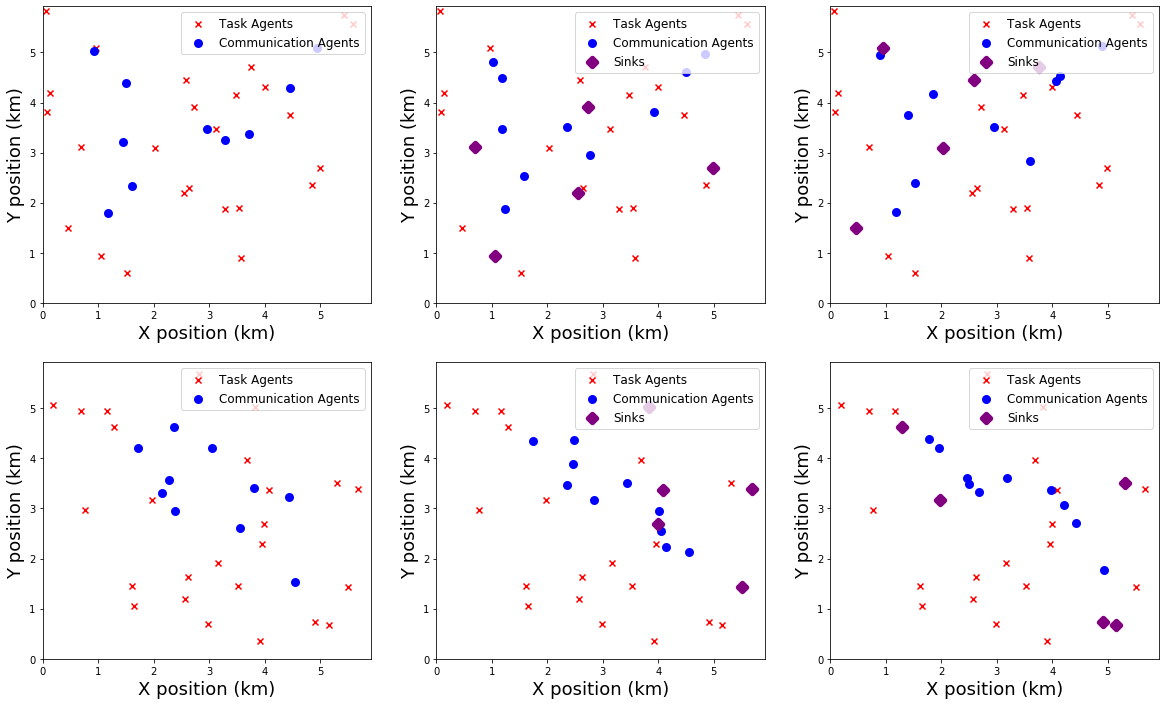

In [10]:

import numpy as np
import matplotlib.pyplot as plt
from moviepy.editor import VideoClip
from moviepy.video.io.bindings import mplfig_to_npimage

# Upload files

nmbr_TA = 25
nmbr_NA = 10
N_exp = 2
sink_1_1 = 5
sink_1_2 = 3
sink_1_3 = 1
path_to_experiment = f'data_multiple_sink/{nmbr_TA}TA{nmbr_NA}NA/experiment_{N_exp}'
path_NA = "/NA_positions.txt"
path_TA = "/TA_positions.txt"

idx_1_2 = []
for j in range(nmbr_TA):
    if ((j+sink_1_2)%5 == 0):
        idx_1_2.append(j)
    
idx_1_3 = []
for j in range(nmbr_TA):
    if ((j+sink_1_3)%5 == 0):
        idx_1_3.append(j)


side_1 = np.sqrt(nmbr_NA + nmbr_TA)

arr_TA = np.loadtxt(path_to_experiment + f'/sink_{sink_1_1}' + path_TA,delimiter=",", dtype=np.float32)
arr_TA_1 = arr_TA.reshape((-1,nmbr_TA,2))

arr_NA = np.loadtxt(path_to_experiment + f'/sink_{sink_1_1}' + path_NA,delimiter=",", dtype=np.float32)
arr_NA_1_1 = arr_NA.reshape((-1,nmbr_NA,2))

arr_NA = np.loadtxt(path_to_experiment + f'/sink_{sink_1_2}' + path_NA,delimiter=",", dtype=np.float32)
arr_NA_1_2 = arr_NA.reshape((-1,nmbr_NA,2))

arr_NA = np.loadtxt(path_to_experiment + f'/sink_{sink_1_3}' + path_NA,delimiter=",", dtype=np.float32)
arr_NA_1_3 = arr_NA.reshape((-1,nmbr_NA,2))


nmbr_TA = 25
nmbr_NA = 10
N_exp = 7
sink_2_1 = 5
sink_2_2 = 1
sink_2_3 = 2


idx_2_2 = []
for j in range(nmbr_TA):
    if ((j+sink_2_2)%5 == 0):
        idx_2_2.append(j)
    
idx_2_3 = []
for j in range(nmbr_TA):
    if ((j+sink_2_3)%5 == 0):
        idx_2_3.append(j)


path_to_experiment = f'data_multiple_sink/{nmbr_TA}TA{nmbr_NA}NA/experiment_{N_exp}'
path_NA = "/NA_positions.txt"
path_TA = "/TA_positions.txt"

side_2 = np.sqrt(nmbr_NA + nmbr_TA)

arr_TA = np.loadtxt(path_to_experiment + f'/sink_{sink_2_1}' + path_TA,delimiter=",", dtype=np.float32)
arr_TA_2 = arr_TA.reshape((-1,nmbr_TA,2))

arr_NA = np.loadtxt(path_to_experiment + f'/sink_{sink_2_1}' + path_NA,delimiter=",", dtype=np.float32)
arr_NA_2_1 = arr_NA.reshape((-1,nmbr_NA,2))

arr_NA = np.loadtxt(path_to_experiment + f'/sink_{sink_2_2}' + path_NA,delimiter=",", dtype=np.float32)
arr_NA_2_2 = arr_NA.reshape((-1,nmbr_NA,2))

arr_NA = np.loadtxt(path_to_experiment + f'/sink_{sink_2_3}' + path_NA,delimiter=",", dtype=np.float32)
arr_NA_2_3 = arr_NA.reshape((-1,nmbr_NA,2))

# Create Image

fig_1, ax = plt.subplots(2,3)
fig_1.set_size_inches(20,12)

ax[0,0].scatter(arr_TA_1[0][:,0],arr_TA_1[0][:,1],c='red',marker='x',linewidths=4)
ax[0,0].scatter(arr_NA_1_1[-1][:,0],arr_NA_1_1[-1][:,1],c='blue',linewidths=3)
ax[0,0].set_xlim(0,side_1)
ax[0,0].set_ylim(0,side_1)
ax[0,0].set_xlabel("X position (km)", fontsize=18)
ax[0,0].set_ylabel("Y position (km)", fontsize=18)
ax[0,0].legend(['Task Agents', 'Communication Agents'],loc='upper right', fontsize=12)


ax[0,1].scatter(arr_TA_1[0][:,0],arr_TA_1[0][:,1],c='red',marker='x',linewidths=4)
ax[0,1].scatter(arr_NA_1_2[-1][:,0],arr_NA_1_2[-1][:,1],c='blue',linewidths=3)
ax[0,1].scatter(arr_TA_1[0][idx_1_2][:,0],arr_TA_1[0][idx_1_2][:,1],c='purple',marker='D',linewidths=5)
ax[0,1].set_xlim(0,side_1)
ax[0,1].set_ylim(0,side_1)
ax[0,1].set_xlabel("X position (km)", fontsize=18)
ax[0,1].set_ylabel("Y position (km)", fontsize=18)
ax[0,1].legend(['Task Agents', 'Communication Agents','Sinks'],loc='upper right', fontsize=12)


ax[0,2].scatter(arr_TA_1[0][:,0],arr_TA_1[0][:,1],c='red',marker='x',linewidths=4)
ax[0,2].scatter(arr_NA_1_3[-1][:,0],arr_NA_1_3[-1][:,1],c='blue',linewidths=3)
ax[0,2].scatter(arr_TA_1[0][idx_1_3][:,0],arr_TA_1[0][idx_1_3][:,1],c='purple',marker='D',linewidths=5)
ax[0,2].set_xlim(0,side_1)
ax[0,2].set_ylim(0,side_1)
ax[0,2].set_xlabel("X position (km)", fontsize=18)
ax[0,2].set_ylabel("Y position (km)", fontsize=18)
ax[0,2].legend(['Task Agents', 'Communication Agents','Sinks'],loc='upper right', fontsize=12)



ax[1,0].scatter(arr_TA_2[0][:,0],arr_TA_2[0][:,1],c='red',marker='x',linewidths=4)
ax[1,0].scatter(arr_NA_2_1[-1][:,0],arr_NA_2_1[-1][:,1],c='blue',linewidths=3)
ax[1,0].set_xlim(0,side_2)
ax[1,0].set_ylim(0,side_2)
ax[1,0].set_xlabel("X position (km)", fontsize=18)
ax[1,0].set_ylabel("Y position (km)", fontsize=18)
ax[1,0].legend(['Task Agents', 'Communication Agents'],loc='upper right', fontsize=12)


ax[1,1].scatter(arr_TA_2[0][:,0],arr_TA_2[0][:,1],c='red',marker='x',linewidths=4)
ax[1,1].scatter(arr_NA_2_2[-1][:,0],arr_NA_2_2[-1][:,1],c='blue',linewidths=3)
ax[1,1].scatter(arr_TA_2[0][idx_2_2][:,0],arr_TA_2[0][idx_2_2][:,1],c='purple',marker='D',linewidths=5)
ax[1,1].set_xlim(0,side_2)
ax[1,1].set_ylim(0,side_2)
ax[1,1].set_xlabel("X position (km)", fontsize=18)
ax[1,1].set_ylabel("Y position (km)", fontsize=18)
ax[1,1].legend(['Task Agents', 'Communication Agents','Sinks'],loc='upper right', fontsize=12)

ax[1,2].scatter(arr_TA_2[0][:,0],arr_TA_2[0][:,1],c='red',marker='x',linewidths=4)
ax[1,2].scatter(arr_NA_2_3[-1][:,0],arr_NA_2_3[-1][:,1],c='blue',linewidths=3)
ax[1,2].scatter(arr_TA_2[0][idx_2_3][:,0],arr_TA_2[0][idx_2_3][:,1],c='purple',marker='D',linewidths=5)
ax[1,2].set_xlim(0,side_2)
ax[1,2].set_ylim(0,side_2)
ax[1,2].set_xlabel("X position (km)", fontsize=18)
ax[1,2].set_ylabel("Y position (km)", fontsize=18)
ax[1,2].legend(['Task Agents', 'Communication Agents','Sinks'],loc='upper right', fontsize=12)



fig_1.show()
fig_1.savefig("plots/multiple_sink_cases.png")

# Plot Scalability

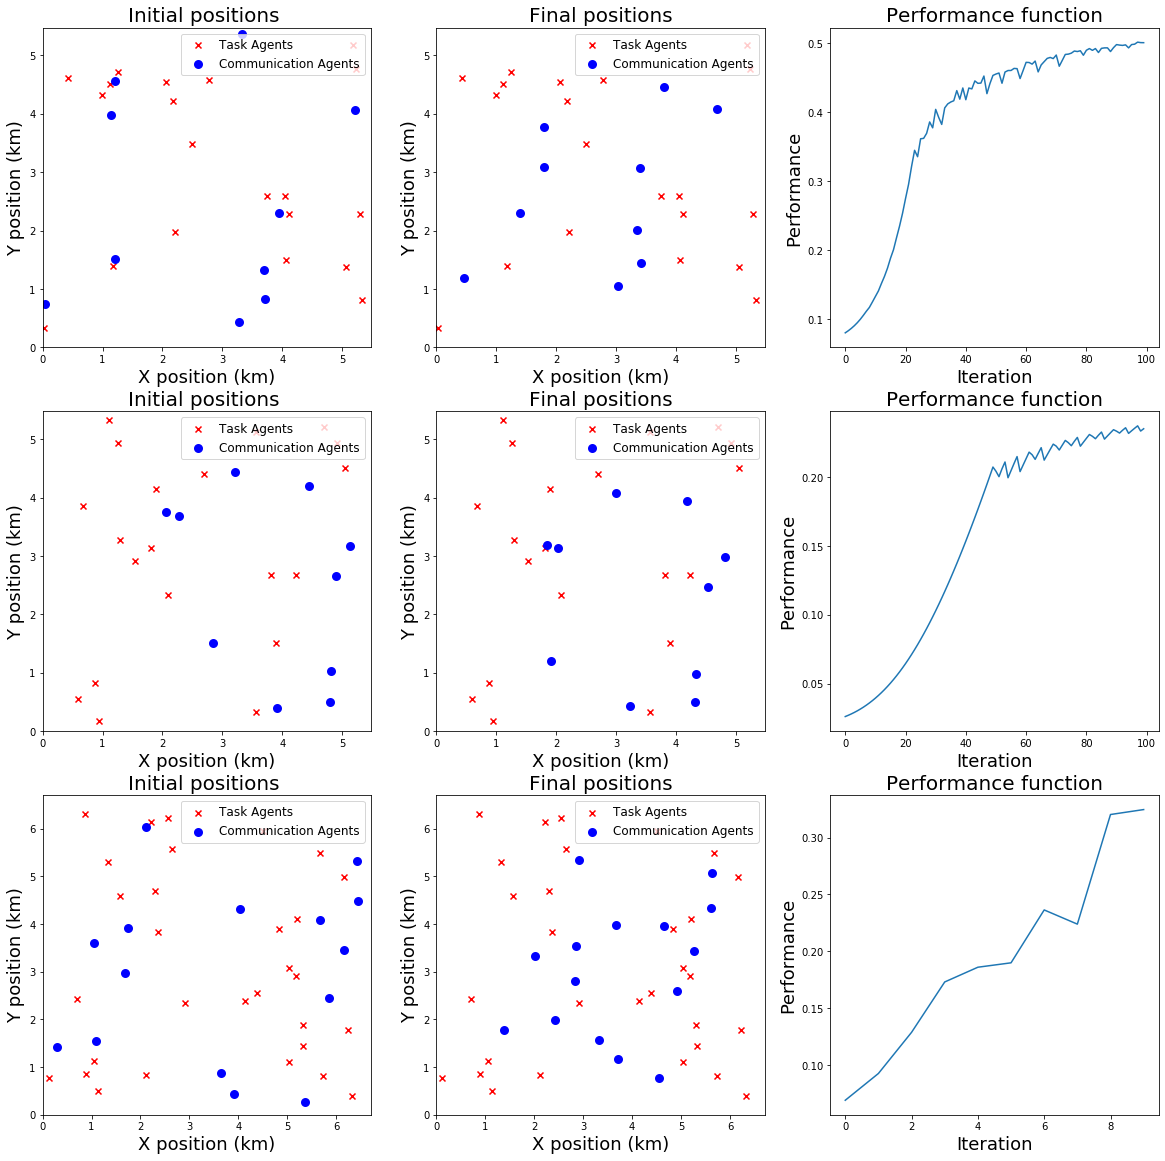

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from moviepy.editor import VideoClip
from moviepy.video.io.bindings import mplfig_to_npimage

# Upload files

nmbr_TA = 20
nmbr_NA = 10
N_exp = 15

path_to_experiment = f'data/{nmbr_TA}TA{nmbr_NA}NA/experiment_{N_exp}'
path_NA = path_to_experiment + "/NA_positions.txt"
path_TA = path_to_experiment + "/TA_positions.txt"
path_performance = path_to_experiment + "/performance.txt"


arr_performance_1 = np.loadtxt(path_performance,delimiter=",", dtype=np.float32)


side_1 = np.sqrt(nmbr_NA + nmbr_TA)
arr_NA = np.loadtxt(path_NA,delimiter=",", dtype=np.float32)
arr_NA_1 = arr_NA.reshape((-1,nmbr_NA,2))

arr_TA = np.loadtxt(path_TA,delimiter=",", dtype=np.float32)
arr_TA_1 = arr_TA.reshape((-1,nmbr_TA,2))


nmbr_TA = 20
nmbr_NA = 10

N_exp = 6

path_to_experiment = f'data/{nmbr_TA}TA{nmbr_NA}NA/experiment_{N_exp}'
path_NA = path_to_experiment + "/NA_positions.txt"
path_TA = path_to_experiment + "/TA_positions.txt"
path_performance = path_to_experiment + "/performance.txt"


arr_performance_2 = np.loadtxt(path_performance,delimiter=",", dtype=np.float32)


side_2 = np.sqrt(nmbr_NA + nmbr_TA)
arr_NA = np.loadtxt(path_NA,delimiter=",", dtype=np.float32)
arr_NA_2 = arr_NA.reshape((-1,nmbr_NA,2))

arr_TA = np.loadtxt(path_TA,delimiter=",", dtype=np.float32)
arr_TA_2 = arr_TA.reshape((-1,nmbr_TA,2))


nmbr_TA = 30
nmbr_NA = 15

N_exp = 6

path_to_experiment = f'data/{nmbr_TA}TA{nmbr_NA}NA/experiment_{N_exp}'
path_NA = path_to_experiment + "/NA_positions.txt"
path_TA = path_to_experiment + "/TA_positions.txt"
path_performance = path_to_experiment + "/performance.txt"


arr_performance_3 = np.loadtxt(path_performance,delimiter=",", dtype=np.float32)


side_3 = np.sqrt(nmbr_NA + nmbr_TA)
arr_NA = np.loadtxt(path_NA,delimiter=",", dtype=np.float32)
arr_NA_3 = arr_NA.reshape((-1,nmbr_NA,2))

arr_TA = np.loadtxt(path_TA,delimiter=",", dtype=np.float32)
arr_TA_3 = arr_TA.reshape((-1,nmbr_TA,2))

# Create Image

fig_1, ax = plt.subplots(3,3)
fig_1.set_size_inches(20,20)

ax[0,0].scatter(arr_TA_1[0][:,0],arr_TA_1[0][:,1],c='red',marker='x',linewidths=4)
ax[0,0].scatter(arr_NA_1[0][:,0],arr_NA_1[0][:,1],c='blue',linewidths=3)
ax[0,0].set_xlim(0,side_1)
ax[0,0].set_ylim(0,side_1)
ax[0,0].set_xlabel("X position (km)", fontsize=18)
ax[0,0].set_ylabel("Y position (km)", fontsize=18)
ax[0,0].set_title("Initial positions ", fontsize=20)
ax[0,0].legend(['Task Agents', 'Communication Agents'],loc='upper right', fontsize=12)

ax[0,1].scatter(arr_TA_1[-1][:,0],arr_TA_1[-1][:,1],c='red',marker='x',linewidths=4)
ax[0,1].scatter(arr_NA_1[-1][:,0],arr_NA_1[-1][:,1],c='blue',linewidths=3)
ax[0,1].set_xlim(0,side_1)
ax[0,1].set_ylim(0,side_1)
ax[0,1].set_xlabel("X position (km)", fontsize=18)
ax[0,1].set_ylabel("Y position (km)", fontsize=18)
ax[0,1].set_title("Final positions", fontsize=20)
ax[0,1].legend(['Task Agents', 'Communication Agents'],loc='upper right', fontsize=12)


ax[0,2].plot(arr_performance_1)
ax[0,2].set_ylabel("Performance", fontsize=18)
ax[0,2].set_xlabel("Iteration", fontsize=18)
ax[0,2].set_title("Performance function", fontsize=20)


ax[1,0].scatter(arr_TA_2[0][:,0],arr_TA_2[0][:,1],c='red',marker='x',linewidths=4)
ax[1,0].scatter(arr_NA_2[0][:,0],arr_NA_2[0][:,1],c='blue',linewidths=3)
ax[1,0].set_xlim(0,side_2)
ax[1,0].set_ylim(0,side_2)
ax[1,0].set_xlabel("X position (km)", fontsize=18)
ax[1,0].set_ylabel("Y position (km)", fontsize=18)
ax[1,0].set_title("Initial positions ", fontsize=20)
ax[1,0].legend(['Task Agents', 'Communication Agents'],loc='upper right', fontsize=12)

ax[1,1].scatter(arr_TA_2[-1][:,0],arr_TA_2[-1][:,1],c='red',marker='x',linewidths=4)
ax[1,1].scatter(arr_NA_2[-1][:,0],arr_NA_2[-1][:,1],c='blue',linewidths=3)
ax[1,1].set_xlim(0,side_2)
ax[1,1].set_ylim(0,side_2)
ax[1,1].set_xlabel("X position (km)", fontsize=18)
ax[1,1].set_ylabel("Y position (km)", fontsize=18)
ax[1,1].set_title("Final positions", fontsize=20)
ax[1,1].legend(['Task Agents', 'Communication Agents'],loc='upper right', fontsize=12)


ax[1,2].plot(arr_performance_2)
ax[1,2].set_ylabel("Performance", fontsize=18)
ax[1,2].set_xlabel("Iteration", fontsize=18)
ax[1,2].set_title("Performance function", fontsize=20)


ax[2,0].scatter(arr_TA_3[0][:,0],arr_TA_3[0][:,1],c='red',marker='x',linewidths=4)
ax[2,0].scatter(arr_NA_3[0][:,0],arr_NA_3[0][:,1],c='blue',linewidths=3)
ax[2,0].set_xlim(0,side_3)
ax[2,0].set_ylim(0,side_3)
ax[2,0].set_xlabel("X position (km)", fontsize=18)
ax[2,0].set_ylabel("Y position (km)", fontsize=18)
ax[2,0].set_title("Initial positions ", fontsize=20)
ax[2,0].legend(['Task Agents', 'Communication Agents'],loc='upper right', fontsize=12)

ax[2,1].scatter(arr_TA_3[-1][:,0],arr_TA_3[-1][:,1],c='red',marker='x',linewidths=4)
ax[2,1].scatter(arr_NA_3[-1][:,0],arr_NA_3[-1][:,1],c='blue',linewidths=3)
ax[2,1].set_xlim(0,side_3)
ax[2,1].set_ylim(0,side_3)
ax[2,1].set_xlabel("X position (km)", fontsize=18)
ax[2,1].set_ylabel("Y position (km)", fontsize=18)
ax[2,1].set_title("Final positions", fontsize=20)
ax[2,1].legend(['Task Agents', 'Communication Agents'],loc='upper right', fontsize=12)

ax[2,2].plot(arr_performance_3)
ax[2,2].set_ylabel("Performance", fontsize=18)
ax[2,2].set_xlabel("Iteration", fontsize=18)
ax[2,2].set_title("Performance function", fontsize=20)


fig_1.show()
fig_1.savefig("plots/intuitive_cases.png")